# MLP

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import matplotlib.pyplot as plt


In [2]:
num_classes = 10

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('image shape', x_train[0].shape)

60000 train samples
10000 test samples
image shape (28, 28)


label:  5


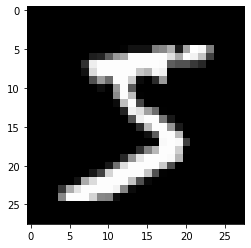

In [3]:
sample = 0
print('label: ', y_train[sample])
image = x_train[sample]

plt.imshow(image, cmap='gray')
plt.show()

In [4]:
input_dim = 28 * 28 #784

x_train = x_train.reshape(60000, input_dim)
x_test = x_test.reshape(10000, input_dim)
print('input shape: ', x_train.shape[1])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

input shape:  784


# Model

In [5]:
model =  keras.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(784,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',   optimizer='adam', metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [6]:
history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size=64,                                   
                    validation_split=0.2,
                    verbose = 2)

Epoch 1/10
750/750 - 3s - loss: 0.2148 - accuracy: 0.9341 - val_loss: 0.1105 - val_accuracy: 0.9662
Epoch 2/10
750/750 - 3s - loss: 0.0831 - accuracy: 0.9744 - val_loss: 0.0951 - val_accuracy: 0.9699
Epoch 3/10
750/750 - 3s - loss: 0.0544 - accuracy: 0.9829 - val_loss: 0.0794 - val_accuracy: 0.9774
Epoch 4/10
750/750 - 3s - loss: 0.0387 - accuracy: 0.9881 - val_loss: 0.1099 - val_accuracy: 0.9700
Epoch 5/10
750/750 - 3s - loss: 0.0303 - accuracy: 0.9902 - val_loss: 0.1009 - val_accuracy: 0.9753
Epoch 6/10
750/750 - 3s - loss: 0.0268 - accuracy: 0.9908 - val_loss: 0.1010 - val_accuracy: 0.9757
Epoch 7/10
750/750 - 3s - loss: 0.0223 - accuracy: 0.9922 - val_loss: 0.1210 - val_accuracy: 0.9733
Epoch 8/10
750/750 - 3s - loss: 0.0211 - accuracy: 0.9933 - val_loss: 0.1079 - val_accuracy: 0.9744
Epoch 9/10
750/750 - 3s - loss: 0.0155 - accuracy: 0.9950 - val_loss: 0.1033 - val_accuracy: 0.9772
Epoch 10/10
750/750 - 3s - loss: 0.0164 - accuracy: 0.9947 - val_loss: 0.0996 - val_accuracy: 0.9790

In [7]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

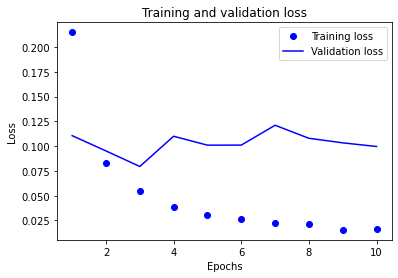

In [8]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [9]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.08862584084272385
Test accuracy: 0.9783999919891357


## Adding Dropout

In [10]:
model =  keras.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(784,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',   optimizer='adam', metrics=['accuracy'])


history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size=64,                                   
                    validation_split=0.2,
                    verbose = 2)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
750/750 - 3s - loss: 0.3606 - accuracy: 0.8878 - val_loss: 0.1342 - val_accuracy: 0.9597
Epoch 2/10
750

## Adding Batch Normalization

In [11]:
model =  keras.Sequential()

model.add(layers.Dense(512, input_shape=(784,)))
model.add(layers.BatchNormalization()) 
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.5))

model.add(layers.Dense(512))
model.add(layers.BatchNormalization()) 
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(10, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',   optimizer='adam', metrics=['accuracy'])


history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size=64,                                   
                    validation_split=0.2,
                    verbose = 2)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
activation_1 (Activation)    (None, 512)              